In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Visualização de Dados

Nesta aula vamos aprender uma técnica bastante utilizada para visualizar conjuntos de dados com mais de 2 atributos. Esta visualização nos permite ter uma idéia da dificuldade do problema de classificação, ou seja, o quão bem esperamos conseguir separar as classes com os atributos que temos disponíveis.

Como estudo de caso, vamos usar a base de dados *wine*, que é muito utilizada em contextos didáticos sobre aprendizagem de máquina. Esta base de dados tem 178 instâncias com 13 atributos de entrada. Cada instância representa medidas fisico-químicas de vinhos produzidos em uma região da itália. O atributo de saída tem 3 classes, cada uma representa um tipo de cultura da uva que foi usada para produzir o vinho.

A base de dados *wine* está disponível no sklearn, no módulo *datasets*.

In [50]:
from sklearn.datasets import load_wine
ds = load_wine(as_frame=True)  #as_frame=True carrega o dataset em um pandas Dataframe, acessível pelo atributo frame

In [51]:
X = ds.data    # um dataframe com todos os atributos de entrada
y = ds.target  # um pandas series com o atributo de saída
df = ds.frame  # um dataframe com todos os atributos de entrada seguido pelo atributo de saída (target)
               # ds.frame é uma concatenação do ds.data e ds.target

In [52]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# PCA - *Principal Component Analysis*

Nas duas primeiras aulas práticas nós usamos um gráfico de pontos (*scatterplot*) para visualizar as instâncias no espaço de atributos. Naquelas aulas visualizamos cada pessoa (instância) como um ponto no plano cartesiano bidimensional, onde o eixo-x representava o atributo **peso** e o eixo-y representava o atributo **altura**. Esta visualização nos dava uma boa idéia da separabilidade das classes, bem como qual atributo seria o mais útil para realizar a classificação. Com base nessa visualização nós percebemos que podíamos obter um bom resultado otimizando um classificador limiar apenas no atributo **altura**.

A grande maioria dos conjuntos de dados que trabalhamos no dia-a-dia tem mais que 2 atributos. Isto faz com que o mapeamento atributo $\to$ eixo coordenado não seja possível visualizar de forma cômoda em mais de duas dimensões. Uma das estratégias para visualizar estes conjuntos de dados é realizar a projeção de todos os **k** atributos para 2 atributos, que então podem ser mapeados para os eixos coordenados em um plano cartesiano. Existem várias projeções na literatura que realçam diferentes características dos dados. Hoje nós vamos aprender o que significa e como podemos usar um algoritmo de redução de dimensionalidade chamdo PCA.

*PCA* é uma ferramenta estatística usada para analisar dados multidimensionais. Intuitivamente, o PCA encontra combinações lineares dos atributos de entrada de forma que dados (instâncias) linearmente correlacionados fiquem mais próximos no espaço latente que pontos não-correlacionados. Os vetores que descrevem cada combinação linear são chamados de componentes principais, e o espaço latente é o espaço vetorial formado por todos os componentes principais. 

Os componentes principais são ordenados, ou seja, o primeiro componente principal é aquele que descreve a direção com a maior variação nos dados. O segundo componente principal é o que descreve a direção com a segunda maior variação dos dados, e assim por diante. Seja **k** o número de atributos. Supondo que há mais instâncias que atributos, há **k** componentes principais em um conjunto de dados. Entretanto, somente os primeiros **c** componentes são mantidos em aplicações de redução de dimensionalidade. Dessa forma, usando **c=2** temos os 2 componentes principais que descrevem a maioria da variação nos dados. Estes 2 componentes principais são mapeados nos eixos coordenados em um plano cartesiano e os **k** atributos são projetados nestes 2 eixos para a visualização das instâncias.

O PCA é um algoritmo de redução de dimensionalidade amplamente utilizado pois é fácil interpretar e o cálculo dos componentes principais pode ser feito de forma muito eficiente, mesmo em grandes conjuntos de dados.

<!-- PCA é linear, fácil de interpretar e rápido de calcular. PCA pode ajudar a verificar se os dados são linearmente separáveis. -->

In [53]:
#A biblioteca sklearn possui uma implementação de PCA baseado em SVD no modulo decomposition
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=2)  #instanciando o PCA, indicando o interesse em manter apenas os 2 primeiros componentes principais.
                           #na prática isto quer dizer que queremos projetar os dados para 2 dimensões.

#Estimar os componentes principais
pca.fit(X)

PCA(n_components=2)

In [55]:
X_pca = pca.transform(X)  # Projetar os 13 atributos nos 2 componentes principais
X_pca_df = pd.DataFrame(X_pca, columns=['PC 0', 'PC 1'])

# Note que a dimensionalidade dos dados projetados agora tem apenas 2 atributos!
print("Instâncias priginais: %s\nInstâncias projetadas nos componentes principais: %s" % (str(X.shape), str(X_pca_df.shape)))

Instâncias priginais: (178, 13)
Instâncias projetadas nos componentes principais: (178, 2)


In [56]:
#plt.scatter(np.arange(len(pca.components_[0])),pca.components_[0])

<AxesSubplot:xlabel='PC 0', ylabel='PC 1'>

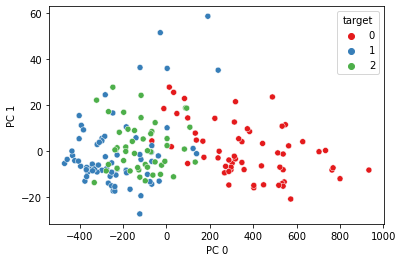

In [57]:
#Plotar os dados projetados nos componentes principais. Colorir os pontos de acordo com o target (atributo de saída)
sns.set_palette('seismic')
sns.scatterplot(data=X_pca_df, x='PC 0', y='PC 1', hue=y, palette='Set1')

O gráfico acima é a projeção PCA sobre os 2 primeiros componentes principais a partir dos 13 atributos do dataset. Note que nesta projeção há sobreposição das instâncias de classes diferentes. Esta sobreposição pode acontecer por vários motivos. Os mais importantes são:

1. Os atributos estão em escalas diferentes;
2. Os atributos não são discriminativos, ou seja, não tem informações suficientes para separar as classes.

O primeiro motivo é relacionado ao pré-processamento dos dados que usamos para encontrar os componentes principais, enquanto o segundo motivo é relacionado aos dados que temos disponíveis. É interessante saber se os dados que já temos são suficientes para separar as classes. Portanto, vamos investigar as escalas dos atributos (motivo 1 acima).

In [58]:
#calcular a média do valor dos atributos para cada classe.
df.groupby('target').mean().transpose()

target,0,1,2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


Veja que temos 3 escalas diferentes:

* Os atributos *alcohol, malic_acid, ash, total_phenols, flavonoids, nonflavonoid_phenols, protoanthocyanins, color_intensity, hue,* e *od280/od315_of_diluted_wines* estão em sua maioria entre 0 e 10;
* Os atributos *alcalinity_of_ash* e *magnesium* estão entre 11 e 100;
* O atributo *proline* está entre 500 e 1100.

O atributo proline tem uma variância maior, uma vez que sua escala também é maior. Desta forma o PCA, que busca maximizar a variância descrita, dá um peso muito maior ao atributo *proline* que os demais atributos. Entretanto, isto não quer dizer as variações no atributo *proline* sejam mais importantes que as variações nos demais atributos que estão medidos em escalas menores.

Para verificar se o atributo *proline* realmente tem o peso desproporcionalmente maior que os demais, basta verificar o peso do componente principal 0, que descreve a direção com a maior variação:

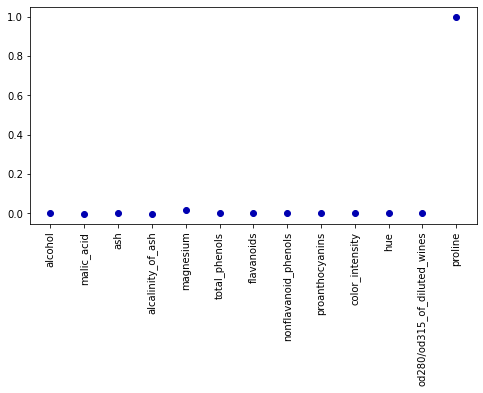

In [82]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(np.arange(len(X.columns)),pca.components_[0])
ax.set_xticks(np.arange(len(X.columns)))
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

Note que realmente o atributo *proline* tem um peso desproporcinalmente maior que os demais atributos. Note também que o atributo *magnesium* tem um pouco mais de peso que os atributos restantes e que este atributo é um dos que estão na escala intermediária. Para garantir que o PCA não vai enviesar os pesos baseado nas escalas, temos que normalizar os atributos para que estejam na mesma escala.

In [87]:
# A biblioteca sklearn tem várias funções para normalizar dados. Uma delas, conhecida como z-score, está encapsulada
# na classe StandardScaler do módulo preprocessing.
from sklearn.preprocessing import StandardScaler

A normalização *z-score*, implementada na classe StandardScaler, é amplamente utilizada para normalizar dados em muitas situações em aprendizagem de máquina. Seja $\mu$ a média amostral de um atributo e $\sigma$ o desvio-padrão. O dado normalizado $z$ de uma instância $x$ é dado por:

$$
z = \frac{x-\mu}{\sigma}
$$

Desta forma, o atributo passa a ter média $0$ e o desvio-padrão unitário. A classe StandardScaler estima os parâmetros $\mu$ e  $\sigma$ separadamente para cada atributo. Desta forma, todos os atributos passam a ter a mesma escala.

In [88]:
ss = StandardScaler()  # instancia o StandardScaler
ss.fit(X)              # estima a média e o desvio-padrão de todos atributos
X_ss = ss.transform(X) # realiza a normalização z-score nos atributos

In [89]:
#calcula o PCA com os atributos normalizados
pca_ss = PCA(n_components=2)
pca_ss.fit(X_ss)
X_ss_pca = pca_ss.transform(X_ss)
X_ss_pca_df = pd.DataFrame(X_ss_pca, columns=['PC 0', 'PC 1'])

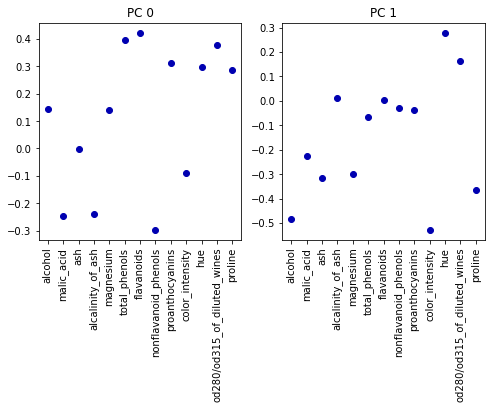

In [100]:
fig, ax = plt.subplots(figsize=(8,4), nrows=1, ncols=2)
for idx, pc in enumerate(pca_ss.components_):
    ax[idx].scatter(np.arange(len(X.columns)), pc)
    ax[idx].set_xticks(np.arange(len(X.columns)))
    ax[idx].set_xticklabels(X.columns, rotation=90)
    ax[idx].set_title('PC %d' % (idx))
plt.show()

Note que os pesos dos atributos em ambos componentes principais estão distribuídos. Isto nos dá a confiança que o PCA não está enviesado em nenhum atributo específico. Como estes componentes foram estimados com dados em mesma escala, sabemos que não há risco de enviesamento por conta de diferenças em escala.

<AxesSubplot:xlabel='PC 0', ylabel='PC 1'>

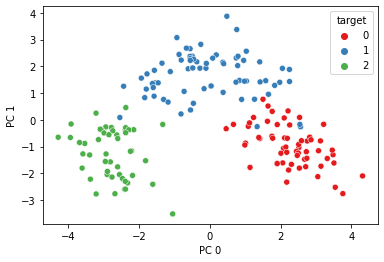

In [102]:
sns.scatterplot(data=X_ss_pca_df, x='PC 0', y='PC 1', hue=y, palette='Set1')

Note que grande parte da sobreposição foi eliminada. Isto ilustra a importância de colocar todos os atributos na mesma escala.

## Interpretação

A interpretação deste gráfico é a seguinte: as três classes podem ser separadas razoavelmente bem usando os atributos da base de dados. A classificação também pode ser realizada no espaço latente gerado pelos componentes principais encontrados pelo PCA. A distinção entre as três classes pode ser feita por um classificador linear, ou seja, que opera criando regiões definidas por um conjunto de retas. 

## Quantificando a representatividade da projeção

Para verificar o quanto que a projeção do PCA representa os dados, podemos avaliar a taxa de variância explicada pelos componentes principais usados na projeção.

In [104]:
pca_ss.explained_variance_ratio_, sum(pca_ss.explained_variance_ratio_)

(array([0.36198848, 0.1920749 ]), 0.5540633835693529)

Note que apenas os 2 primeiros componentes principais conseguem capturar 55% da variação dos dados. Esta taxa pode ser considerada, a grosso modo, como a capacidade da representação da projeção 2D dos 13 atributos originais. Note também pelo gráfico que estes componentes já conseguem mostrar a separabilidade linear das classes, o que aumenta nossa confiança que o problema de classificação subjacente é um problema "fácil".

Note também que a taxa da variância explicada pelo PC0 é 36%, que é praticamente o dobro da taxa da variância explicada pelo PC1, que é de 19%. Isto quer dizer que a variância entre a separação dos pontos no eixo-x é praticamente o dobro da variância explicada pela separação dos pontos no eixo-y. Portanto, as distâncias maiores dos pontos no eixo-x representam diferenças maiores do que distâncias maiores dos pontos no eixo-y.